# Data Import

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [2]:
# Set the run_code to test | run
run_code = 'run'

In [3]:
if run_code == 'run':
    dataset_path = '/kaggle/input/sncb-eda-data-clean/cleaned_ar41_for_ulb.csv'
else:
    dataset_path = '/kaggle/input/sncb-data-augumentation/enriched_cleaned_ar41_for_ulb.csv'

# Check if the file exists before trying to read it
if os.path.exists(dataset_path):
    data = pd.read_csv(dataset_path)

    # Display the basic information and the first few rows of the dataframe
    data_info = data.info()
    data_head = data.head()

    # If you want to print the information to the console
    print(data_info)
    print(data_head)
else:
    print(f"The file {dataset_path} does not exist.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17677337 entries, 0 to 17677336
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamps_UTC      object 
 1   mapped_veh_id       float64
 2   lat                 float64
 3   lon                 float64
 4   RS_E_InAirTemp_PC1  float64
 5   RS_E_InAirTemp_PC2  float64
 6   RS_E_OilPress_PC1   float64
 7   RS_E_OilPress_PC2   float64
 8   RS_E_RPM_PC1        float64
 9   RS_E_RPM_PC2        float64
 10  RS_E_WatTemp_PC1    float64
 11  RS_E_WatTemp_PC2    float64
 12  RS_T_OilTemp_PC1    float64
 13  RS_T_OilTemp_PC2    float64
 14  date                object 
 15  hour                int64  
 16  dayofweek           int64  
 17  weekday             object 
dtypes: float64(13), int64(2), object(3)
memory usage: 2.4+ GB
None
        timestamps_UTC  mapped_veh_id        lat       lon  \
0  2023-01-23 07:25:08          102.0  51.017864  3.769079   
1  2023-01-23 07:25:16          1

In [4]:
data['lat'] = data['lat'].astype('float32')
data['lon'] = data['lon'].astype('float32')

# Speed Calculate

In [5]:
# Convert timestamps to datetime format
data['timestamps_UTC'] = pd.to_datetime(data['timestamps_UTC'])

# Vectorize the distance calculation
def calculate_distances(lats, lons):
    distances = np.zeros(len(lats))
    for i in range(1, len(lats)):
        if not np.isnan(lats[i]) and not np.isnan(lons[i]):
            distances[i] = geodesic((lats[i-1], lons[i-1]), (lats[i], lons[i])).kilometers
    return distances

# Calculate distances using the vectorized function
latitudes = data['lat'].to_numpy()
longitudes = data['lon'].to_numpy()
data['Distance'] = calculate_distances(latitudes, longitudes)

# Calculate time intervals in hours
time_diffs = data['timestamps_UTC'].diff().dt.total_seconds() / 3600
time_diffs[0] = np.nan  # first element will be NaT after diff

# Calculate speeds in km/h
data['Speed'] = data['Distance'] / time_diffs

# Replace infinite values with NaN if division by zero occurred
data['Speed'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Print the results
print(data[['timestamps_UTC', 'lat', 'lon', 'Distance', 'Speed']])

              timestamps_UTC        lat       lon  Distance      Speed
0        2023-01-23 07:25:08  51.017864  3.769078  0.000000        NaN
1        2023-01-23 07:25:16  51.017876  3.769046  0.002593   1.166701
2        2023-01-23 07:25:37  51.017208  3.770179  0.108769  18.646103
3        2023-01-23 07:25:41  51.016914  3.771036  0.068434  61.590906
4        2023-01-23 07:26:10  51.016502  3.772182  0.092596  11.494614
...                      ...        ...       ...       ...        ...
17677332 2023-09-13 17:33:03  50.402695  4.450110  0.011761   8.467873
17677333 2023-09-13 17:33:58  50.401657  4.452693  0.216873  14.195295
17677334 2023-09-13 17:34:03  50.401829  4.452218  0.038821  27.950893
17677335 2023-09-13 17:34:58  50.401058  4.455389  0.241191  15.787055
17677336 2023-09-13 17:35:04  50.401085  4.455169  0.015909   9.545136

[17677337 rows x 5 columns]


In [6]:
# Set 'Speed' to 0 where 'Speed' is greater than 120
data.loc[data['Speed'] > 120, 'Speed'] = 0

In [7]:
# Change data type to reduce the data size
data['Distance'] = data['Distance'].astype('float32')
data['Speed'] = data['Speed'].astype('float32')

# Distribution of Distance

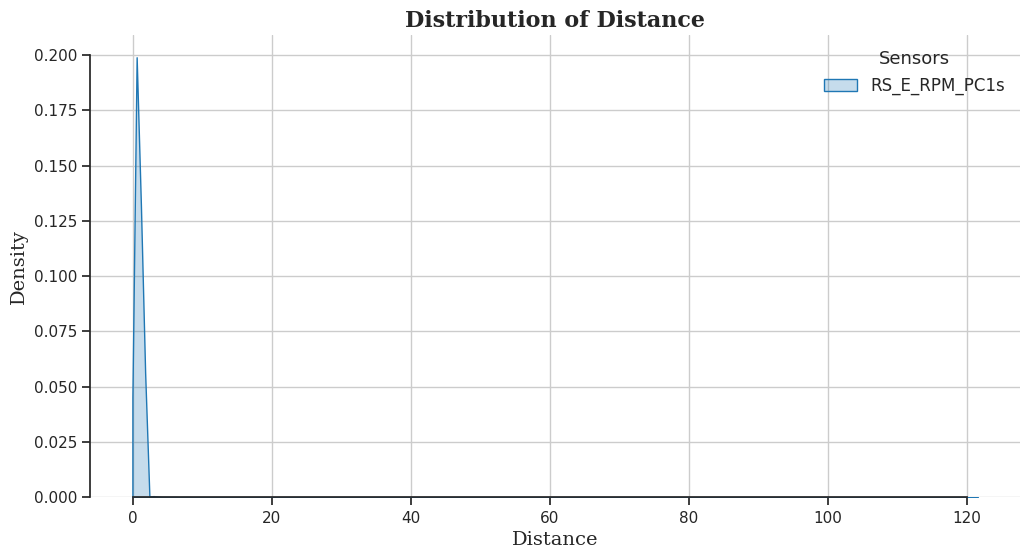

In [8]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_RPM_PC1
sns.kdeplot(data['Distance'], fill=True, color="#1f77b4", label='RS_E_RPM_PC1s', bw_adjust=0.5)


# Adding titles and labels with a formal font type
plt.title('Distribution of Distance', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Distance', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()

# Distribution of Speed

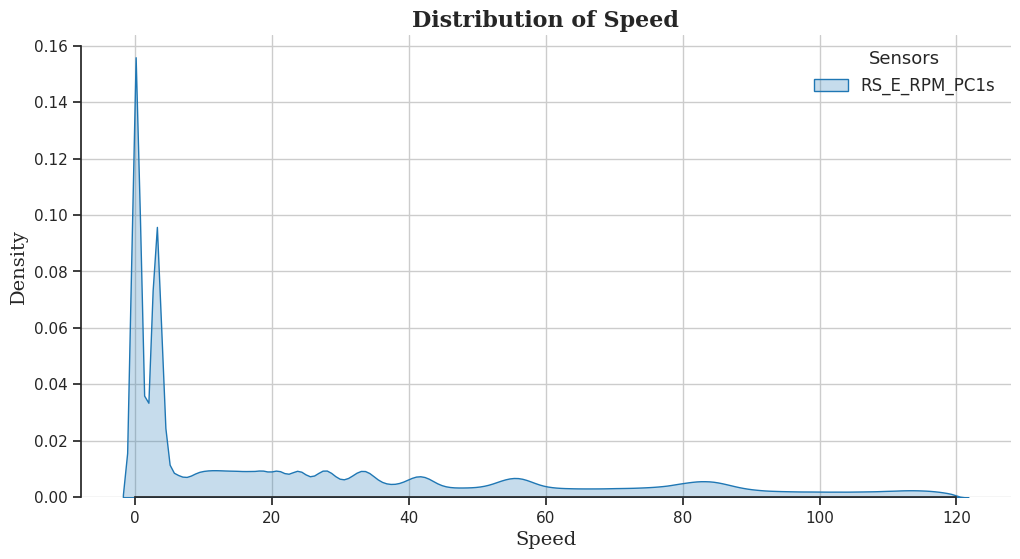

In [9]:
# Setting the overall aesthetics for the plot to have an academic look
sns.set_theme(style='ticks', palette='muted')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plotting the Kernel Density Estimate (KDE) plot for RS_E_RPM_PC1
sns.kdeplot(data['Speed'], fill=True, color="#1f77b4", label='RS_E_RPM_PC1s', bw_adjust=0.5)


# Adding titles and labels with a formal font type
plt.title('Distribution of Speed', fontsize=16, fontweight='bold', family='serif')
plt.xlabel('Speed', fontsize=14, family='serif')
plt.ylabel('Density', fontsize=14, family='serif')

# Adding gridlines and removing the top and right axis lines for a cleaner look
sns.despine(trim=True)
plt.grid(True)

# Adjusting the legend to be more formal
plt.legend(title='Sensors', title_fontsize='13', fontsize='12', frameon=False)

# Show the plot with the improved academic aesthetics
plt.show()

# Save to CSV

In [10]:
data.to_csv('enriched_cleaned_ar41_for_ulb.csv', index=True)